In [121]:
import pandas as pd
import numpy as np
import scipy
from scipy import signal, fftpack
import matplotlib.pyplot as plt

df1 = pd.read_csv(r'real.csv')
df2 = pd.read_csv(r'sim.csv')
df3 = (df1+df2)/2

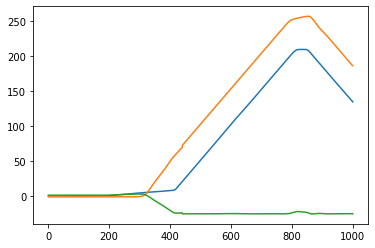

In [103]:
plt.plot(df1.x, df1.y, df2.x, -df2.y, df3.x, df3.y)

-1


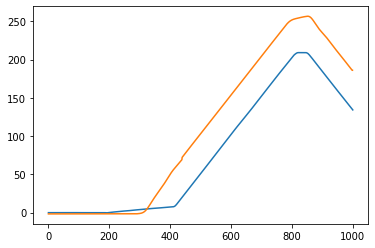

In [104]:
shft01 = np.argmax(signal.correlate(df1.y, -df2.y)) - len(df2.y)
print (shft01)
plt.figure()
plt.plot(df1.x, df1.y,
         df2.x.shift(-shft01), -df2.y)
fig = plt.gcf()

In [105]:
xcor = np.correlate(df1.y, -df2.y, "full")
print (xcor)
nR = max(xcor)
maxLag = np.argmax(xcor)  # I imported numpy as np here
print (nR)
print(maxLag)

[  -7.73062897  -15.6687416   -23.84531738 ... -666.98794262 -443.83174901
 -221.5023396 ]
16088355.91727781
999


In [106]:
print(shift)

673.0


688.0
673.0


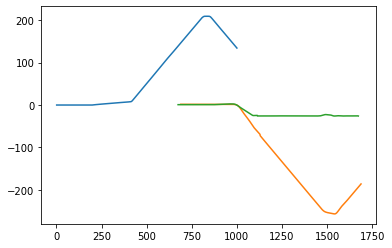

In [107]:
plt.plot(df1.x, df1.y)
for target in [df2, df3]:
    dx = np.mean(np.diff(df1.x.values))
    shift = (np.argmax(signal.correlate(df1.y, target.y)) - (len(target.y)-1)) * dx
    print(shift)
    plt.plot(target.x + shift, target.y)

-1


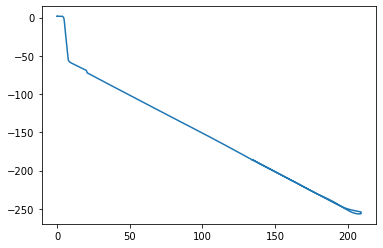

In [108]:
shft01 = np.argmax(signal.correlate(df1.y, -df2.y)) - len(df1.y)
print (shft01)
plt.figure()
plt.plot(df1.y, df2.y)
fig = plt.gcf()

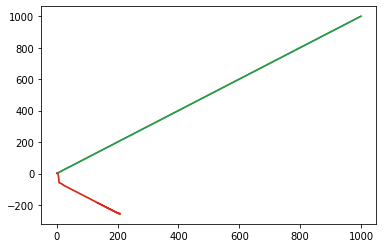

In [109]:
plt.figure()
plt.plot(df1, df2,
         df1.shift(-shft01), df2)
fig = plt.gcf()

Now we're going to try using a FFT comparison

nR 88 Lag 16


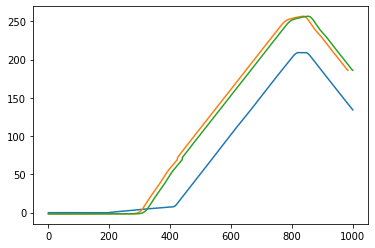

In [129]:
a = np.array(df1.y)
b = np.array(-df2.y)
orrfirst = signal.correlate(a,b)
corrsecond = signal.correlate(b,a)
xcor = np.correlate(a, b, "full")
nR = max(corrfirst)
maxLag = np.argmax(corrfirst)  # I imported numpy as np here
print("nR", nR, "Lag", maxLag)
plt.figure()
plt.plot(df1.x, df1.y,
         df2.x.shift(maxLag), -df2.y, df2.x, -df2.y)
fig = plt.gcf()

In [ ]:
A = fftpack.fft(a)
B = fftpack.fft(b)
Ar = -A.conjugate()
Br = -B.conjugate()
first = np.argmax(np.abs(fftpack.ifft(Ar*B)))
second = np.argmax(np.abs(fftpack.ifft(A*Br)))
print (first)
print (second)

Now we'll do it without the FFT

In [150]:
a = np.array([0, 1, 2, 3, 4, 3, 2, 1, 0, 1, 2, 3, 4, 3, 2, 1, 0, 0, 0, 0, 0])
b = np.array([0, 0, 0, 0, 0, 1, 2, 3, 4, 3, 2, 1, 0, 1, 2, 3, 4, 3, 2, 1, 0])
corrfirst = signal.correlate(a,b)
corrsecond = signal.correlate(b,a)
xcor = np.correlate(a, b, "full")
nR = max(corrfirst)
maxLag = np.argmax(corrfirst)  # I imported numpy as np here
print("nR", nR, "Lag", maxLag)

first = np.argmax(signal.correlate(a,b))
second = np.argmax(signal.correlate(b,a))
nR = max(xcor)
maxLag = np.argmax(xcor)  # I imported numpy as np here
a = pd.DataFrame(a)
b = pd.DataFrame(b)


nR 88 Lag 16


Now we need to get ready to shift the data by the amount needed to align it with the other dataset. Rather than just using the df.shift() command, which loses the data that falls off the end, we'll just slice off the end of the dataset by the amount needed for the shift and then append that to the otherside, creating a new dataset that's effectively rotated.

In [ ]:




print(b.shift(3), "end")
plt.figure()
plt.plot(a)
plt.plot(b)
plt.plot(a.shift(maxLag))

fig = plt.gcf()
print(first)
print(second)
df1 = pd.read_csv(r'real2.csv')
df2 = pd.read_csv(r'sim2.csv')
a = np.array(df1)
b = np.array(-df2)
first = np.argmax(signal.correlate(a,b))
second = np.argmax(signal.correlate(b,a))
print(first)
print(second)

In [88]:
af = scipy.fft.fft(a)
bf = scipy.fft.fft(b)
c = scipy.fft.ifft(af * np.conj(bf))

time_shift = np.argmax(abs(c))
print(time_shift)

0
